In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler

In [25]:
(X_train,y_train), (X_test, y_test) = mnist.load_data()

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [27]:
X_train = X_train/255
X_test = X_test/255

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [29]:
X_train[0].shape

(28, 28)

In [30]:
encoder = Sequential()
encoder.add(Flatten(input_shape = [28, 28]))
encoder.add(Dense(400, activation = 'relu'))
encoder.add(Dense(200, activation = 'relu'))
encoder.add(Dense(100, activation = 'relu'))
encoder.add(Dense(50, activation = 'relu'))
encoder.add(Dense(25, activation = 'relu'))

In [31]:
decoder = Sequential()
decoder.add(Dense(50, input_shape = [25], activation = 'relu'))
decoder.add(Dense(100, activation = 'relu'))
decoder.add(Dense(200, activation = 'relu'))
decoder.add(Dense(400, activation = 'relu'))
decoder.add(Dense(784, activation = 'sigmoid'))
decoder.add(Reshape([28,28]))

In [32]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss = 'binary_crossentropy', optimizer = SGD(learning_rate = 1.5), metrics = ['accuracy'])

In [33]:
autoencoder.fit(X_train, X_train, epochs = 10, validation_data = [X_test, X_test])

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2496 - accuracy: 0.0867 - val_loss: 0.2083 - val_accuracy: 0.1251
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1885 - accuracy: 0.1544 - val_loss: 0.1744 - val_accuracy: 0.1766
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1690 - accuracy: 0.1837 - val_loss: 0.1572 - val_accuracy: 0.1948
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1518 - accuracy: 0.2052 - val_loss: 0.1497 - val_accuracy: 0.2058
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1427 - accuracy: 0.2183 - val_loss: 0.1376 - val_accuracy: 0.2252
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1364 - accuracy: 0.2265 - val_loss: 0.1322 - val_accuracy: 0.2303
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1319 - accuracy: 0.2339 - val_loss: 0.1286 - val_ac

In [34]:
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 101ms/step


Original Image


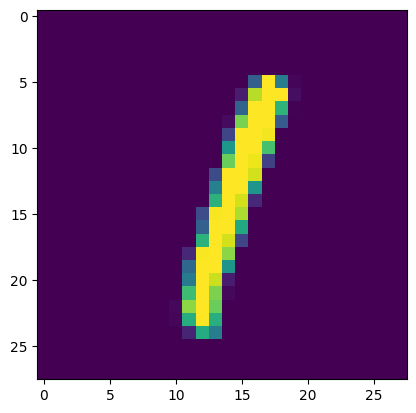

Attempted Rconstruction (after autoencoder)


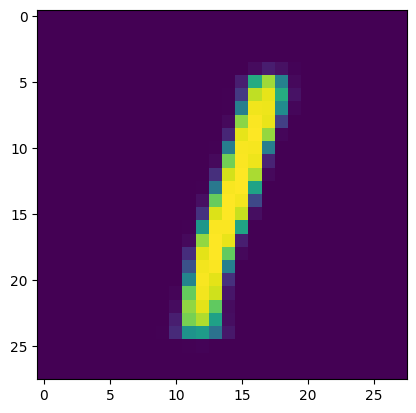

In [40]:
n = 5
print("Original Image")
plt.imshow(X_test[n])
plt.show()
print("Attempted Rconstruction (after autoencoder)")
plt.imshow(passed_images[n])

In [41]:
from tensorflow.keras.layers import GaussianNoise

In [42]:
sample = GaussianNoise(0.2)

In [43]:
noisey = sample(X_test[:10], training = True)

Original


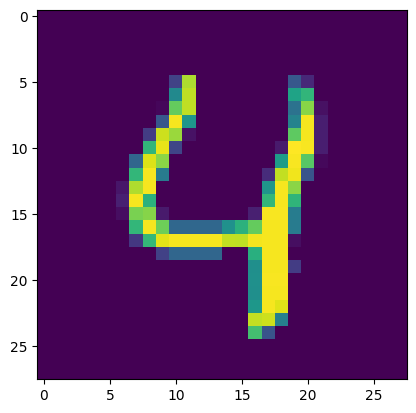

Noisey


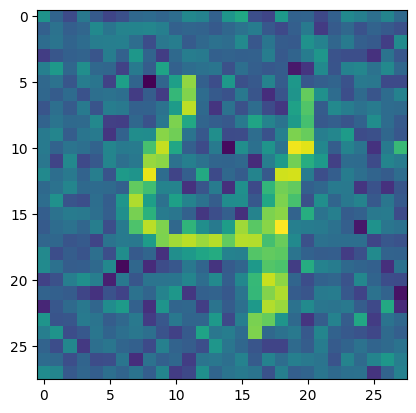

In [46]:
n = 4
print("Original")
plt.imshow(X_test[n])
plt.show()
print("Noisey")
plt.imshow(noisey[n])
plt.show()

In [47]:
tf.random.set_seed(101)
np.random.seed(101)
encoder = Sequential()
encoder.add(Flatten(input_shape = [28, 28]))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400, activation = 'relu'))
encoder.add(Dense(200, activation = 'relu'))
encoder.add(Dense(100, activation = 'relu'))
encoder.add(Dense(50, activation = 'relu'))
encoder.add(Dense(25, activation = 'relu'))

In [48]:
decoder = Sequential()
decoder.add(Dense(50, input_shape = [25], activation = 'relu'))
decoder.add(Dense(100, activation = 'relu'))
decoder.add(Dense(200, activation = 'relu'))
decoder.add(Dense(400, activation = 'relu'))
decoder.add(Dense(784, activation = 'sigmoid'))
decoder.add(Reshape([28,28]))

In [49]:
noise_remover = Sequential([encoder, decoder])

In [50]:
noise_remover.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [51]:
noise_remover.fit(X_train, X_train, epochs = 8)

Epoch 1/8
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1683 - accuracy: 0.1853
Epoch 2/8
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1298 - accuracy: 0.2323
Epoch 3/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1212 - accuracy: 0.2461
Epoch 4/8
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1168 - accuracy: 0.2543
Epoch 5/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1131 - accuracy: 0.2601
Epoch 6/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1105 - accuracy: 0.2654
Epoch 7/8
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1082 - accuracy: 0.2693
Epoch 8/8
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1064 - accuracy: 0.2724


In [52]:
ten_noisey_images = sample(X_test[:10], training = True)

In [53]:
denoised = noise_remover(ten_noisey_images)

ORIGINAL IMAGES


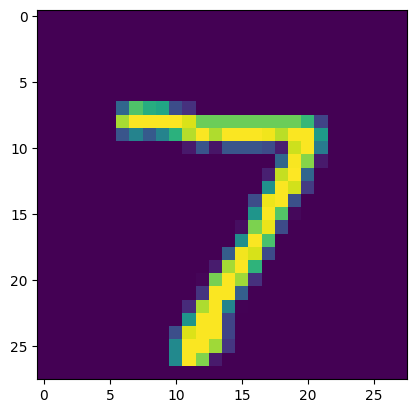

NOISE ADDED IMAGE


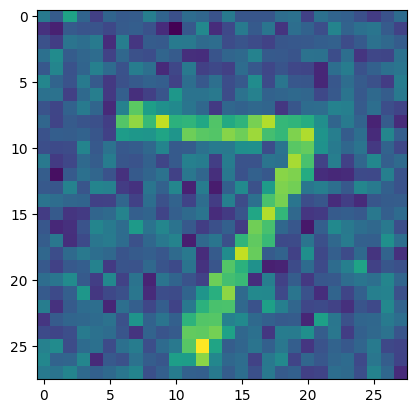

AFTER NOISE REMOVAL FROM AUTOENCODER


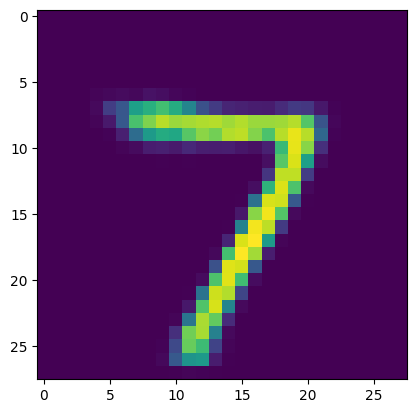

In [54]:
n = 0
print("ORIGINAL IMAGES")
plt.imshow(X_test[n])
plt.show()
print("NOISE ADDED IMAGE")
plt.imshow(ten_noisey_images[n])
plt.show()
print("AFTER NOISE REMOVAL FROM AUTOENCODER")
plt.imshow(denoised[n])
plt.show()